# Diagrams

Catlab supports the expression of equations in an arbitrary category via
diagrams, or functors from a finitely presented category. This view of
diagrammatic equations builds on the Catlab approach to functorial semantics
by asserting that a system of equations of shape J is a functor F: J → 𝐂. We
can draw these equations with Graphviz, where each node is an object in
X:Ob(J) labeled with its type F(X) and each edge is a morphism in J labeled
with its image under F.

In [1]:
using Catlab, Catlab.Theories, Catlab.CategoricalAlgebra
using Catlab.Graphs, Catlab.Graphics, Catlab.Programs

draw(D::FinFunctor) = to_graphviz(D, node_labels=true, edge_labels=true, prog="neato")

draw (generic function with 1 method)

## Present a diagram in a given category

Recall that a *diagram* in a category $C$ is a functor $F: J → C$ from a
small category $J$ into $C$. Given the category $C$, this macro presents a
diagram in $C$, i.e., constructs a finitely presented indexing category $J$
together with a functor $F: J → C$. This method of simultaneous definition is
often more convenient than defining $J$ and $F$ separately.
often more convenient than defining $J$ and $F$ separately, as could be
accomplished by calling `@fincat` and then `@finfunctor`.
For example, the limit of the following diagram consists of the paths of length
two in a graph:

In [2]:
D₂ = @free_diagram SchGraph begin
  v::V
  (e₁, e₂)::E
  tgt(e₁) == v
  src(e₂) == v
end

FinFunctor(Catlab.Theories.FreeSchema.Ob{:generator}[V, E, E], Catlab.Theories.FreeSchema.Hom{:generator}[tgt, src], FinCat(Catlab.Programs.DiagrammaticPrograms.NamedGraph{Symbol, Union{Nothing, Symbol}} {V = 3, E = 2}), FinCat(Presentation{ThSchema, Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V, E], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src, tgt], AttrType = Catlab.Theories.FreeSchema.AttrType{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:src=>(:Hom=>1), :V=>(:Ob=>1), :E=>(:Ob=>2), :tgt=>(:Hom=>2)), Pair[])))

Morphisms in the indexing category can be left unnamed, which is convenient for
defining free diagrams (see also `@free_diagram`. Of course, unnamed morphisms cannot
be referenced by name within the `@diagram` call or in other settings, which
can sometimes be problematic.

We can also draw the resulting diagrams.

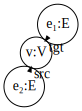

In [3]:
draw(D₂)

For small equations the point-free notation commonly employed in functional programming is very convenient; however, there is a reason it is not the standard approach to presenting equations in mathematical writing. Variables are just too useful! As the size of the system of equations grows, it becomes more and more convenient to use variable names. This is why `Catlab.Programs.@program` exists to help people write SMC morphisms with the point-ful notation they are familiar with in imperative or procedural programming.

We can describe a triangle in a graph using the vertex variables v₁, v₂, v₃ and edge variables e₁, e₂, e₃. Then we use the equation notation to assert the `src` and `tgt` relationships between the edges and vertices.

In [4]:
D₃ = @free_diagram SchGraph begin
  (v₁, v₂, v₃)::V
  (e₁, e₂, e₃)::E
  src(e₁) == v₁
  tgt(e₁) == v₂
  src(e₂) == v₂
  src(e₃) == v₁
  tgt(e₂) == v₃
  tgt(e₃) == v₃
end

FinFunctor(Catlab.Theories.FreeSchema.Ob{:generator}[V, V, V, E, E, E], Catlab.Theories.FreeSchema.Hom{:generator}[src, tgt, src, src, tgt, tgt], FinCat(Catlab.Programs.DiagrammaticPrograms.NamedGraph{Symbol, Union{Nothing, Symbol}} {V = 6, E = 6}), FinCat(Presentation{ThSchema, Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V, E], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src, tgt], AttrType = Catlab.Theories.FreeSchema.AttrType{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:src=>(:Hom=>1), :V=>(:Ob=>1), :E=>(:Ob=>2), :tgt=>(:Hom=>2)), Pair[])))

You can see the shape of a triangle when you draw this diagram. This coincidence can be systematically understood (by an experienced category theorist) via the Grothendieck construction and representable functors.

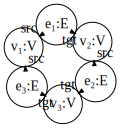

In [5]:
draw(D₃)

## Sequences in
In any category with an endomorphism f: A → A, we can think of recurrence equations as aₙ = f(aₙ₋₁)) starting at a₀.

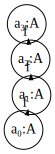

In [6]:
@present 𝗖(FreeCartesianCategory) begin
  (A,B)::Ob
  f::Hom(A,A)
  g::Hom(A,B)
end

seq₃ = @free_diagram 𝗖 begin
  (a₀,a₁,a₂,a₃)::A
  a₁ == f(a₀)
  a₂ == f(a₁)
  a₃ == f(a₂)
end

draw(seq₃)

Inspired by linear recurrence relations like the Fibonacci sequence we can think of A and B as vector spaces. An endomorphism f: A → A and morphism g: A → B defines a linear recurrence by applying f to update the system state and g to compute the current term in the sequence. This can be visualized as follows.

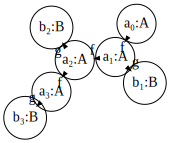

In [7]:
obs_seq₃ = @free_diagram 𝗖 begin
  (a₀,a₁,a₂,a₃)::A
  (b₁, b₂, b₃ )::B
  a₁ == f(a₀)
  b₁ == g(a₁)
  a₂ == f(a₁)
  b₂ == g(a₂)
  a₃ == f(a₂)
  b₃ == g(a₃)
end
draw(obs_seq₃)

In the case of the Fibonacci sequence A is ℝ² and B is ℝ with f = [1 1; 1 0] and g = π₁.

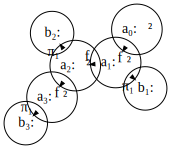

In [8]:
@present 𝐃(FreeCartesianCategory) begin
  (ℝ²,ℝ)::Ob
  f::Hom(ℝ²,ℝ²)
  π₁::Hom(ℝ²,ℝ)
end

fib_seq₃ = @free_diagram 𝐃 begin
  (a₀,a₁,a₂,a₃)::ℝ²
  (b₁, b₂, b₃ )::ℝ
  a₁ == f(a₀)
  b₁ == π₁(a₁)
  a₂ == f(a₁)
  b₂ == π₁(a₂)
  a₃ == f(a₂)
  b₃ == π₁(a₃)
end

draw(fib_seq₃)

A lift of this diagram is a choice of vectors `a₀,…,a₃` and scalars `b₁,…,b₃` that satisfy the linear recurrence formulation of the Fibonacci sequence. The arrows in 𝐃 are treated as fixed for the purpose of the lifting problem. Suppose you knew `b₁,…,b₃`, and wanted to infer the state vectors `a₁,…,a₃`. This can be seen as a boundary value problem where you have observations on a subspace playing the role of boundary conditions and want to infer the system state on the interior of the domain. As you can see from this diagram, solving the lifting problem with only partial information can require some creativity. You need to use the structure of the codomain category, in this case 𝐃 which is a subcategory of finite dimensional vector spaces over ℝ and the combinatorics of 𝐉 to set up some equations you can solve. In order to obtain an efficient algorithm for the lifting problem, you would need to exploit the structure of the morphisms `f,π₁` to create a system of equations.

An observation that `[π₁f;π₁] = f` lets you set up the equation `[b₃ ; b₂] = f a₂` and then you can use the fact that `f` is invertable to solve for a unique `a₂`. Once you have a single value of `aᵢ` you can get the rest from the application of `f` or `f⁻¹`. A general purpose algorithm for solving lifting problems in arbitrary categories would be a wildly powerful tool.

## Newton's Method
The equations that we have seen aren't particularly interesting, so we turn to a classic of numerical methods. Newton's method for root finding. For an overview of Netwon's method see [Fundamentals of Numerical Computation](https://fncbook.github.io/fnc/nonlineqn/newton.html). The following presentation doesn't know that f′ is the derivative of f, they are just two functions that are evocatively named. We could use [CombinatorialSpaces.jl](https://github.com/AlgebraicJulia/CombinatorialSpaces.jl) to formulate this in a richer categorical setting where we could assert `f′ := d/dx(f)`.

In [9]:
@present Analytic(FreeCartesianCategory) begin
  (ℝ,ℝ²)::Ob
  π₁::Hom(ℝ², ℝ)
  π₂::Hom(ℝ², ℝ)
  plus ::Hom(ℝ², ℝ)
  times::Hom(ℝ², ℝ)
  f    ::Hom(ℝ,ℝ)
  f′   ::Hom(ℝ,ℝ)
end

Presentation{ThCartesianCategory, Symbol}(Catlab.Theories.FreeCartesianCategory, (Ob = Catlab.Theories.FreeCartesianCategory.Ob{:generator}[ℝ, ℝ²], Hom = Catlab.Theories.FreeCartesianCategory.Hom{:generator}[π₁, π₂, plus, times, f, f′]), Dict(:f => (:Hom => 5), :f′ => (:Hom => 6), :times => (:Hom => 4), :ℝ² => (:Ob => 2), :π₁ => (:Hom => 1), :ℝ => (:Ob => 1), :π₂ => (:Hom => 2), :plus => (:Hom => 3)), Pair[])

According to the standard formula xₖ₊₁ = xₖ - f(xₖ)/f′(xₖ). The standard presentation of Newton's method relies on the fact that ℝ is a field to use division in the definition of the iterative procedure. Because of the constraint that you can't divide by 0 in a field, fields are not models of any algebraic theory. Because of this, we can multiply both sides by f′(xₖ) and define a Newton's method iteration without reference to division. We also can avoid negation by adding the f(xₖ) term on both sides.

Once we have put Newton's method into this relational form we can use a prefix notation for operators which makes the structure closer to the diagrammatic approach `plus(times(f′(xₖ), xₖ₊₁), f(xₖ)) == times(f′(xₖ), xₖ)`.

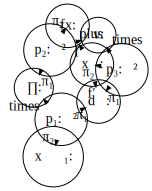

In [10]:
newtons = @free_diagram Analytic begin
  (xₖ, xₖ₊₁, dₖ, fx, v, ∏)::ℝ
  (p₁, p₂, p₃)::ℝ²
  dₖ  == f′(xₖ)
  π₁(p₁) == dₖ
  π₂(p₁) == xₖ₊₁
  ∏ == times(p₁)
  fx == f(xₖ)
  π₁(p₂) == ∏
  π₂(p₂) == fx
  plus(p₂) == v
  π₁(p₃) == dₖ
  π₂(p₃) == xₖ
  times(p₃) == v
end

draw(newtons)

This is definitely a case where standard mathematical notation wins for brevity and clarity. To compete with traditional notation, we need a few ergonamic improvements to the diagrammatic equation approach.
1. The ability to assert equations without introducing temporary variables,
2. The ability to represent morphisms f: A×B → C as bivariate functions like `f(a:A, b:B)`,
While encoding simple equations can be more verbose than the traditional notation, the diagrammatic encoding provides a direct route to creating a category whose objects are systems of equations and whose morphisms are relationships between systems of equations. That category is the first step towards leveraging the constructive approach in Catlab to making hierarchical representations of complex systems of equations.